# Convolutional Neural Network 구현
- MNIST 손글씨 data를 이용하여 CNN을 학습하고 MLP와 결과와 비교.

In [ ]:
import matplotlib.pyplot as plt
# 학습결과 그래프 함수
# loss 그래프
def plot_loss(history):
#     plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], label='Train loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [ ]:
# accuracy 그래프
def plot_accuracy(history):
#     plt.figure(figsize=(10,7))
    plt.plot(history.history['accuracy'], label='Train accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

# MNIST CNN 적용

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
import numpy as np

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

In [ ]:
# 하이퍼파라미터 설정
LEARNING_RATE = 0.001
N_EPOCHS = 20
N_BATCHS = 100
N_CLASS = 10

In [ ]:
# 데이터 로드
(train_image, train_label), (test_image,test_label) = keras.datasets.mnist.load_data()
train_image.shape, train_label.shape, test_image.shape,test_label.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# 추가 변수 설정
N_TRAIN = train_image.shape[0]
N_TEST = test_image.shape[0]

In [ ]:
# 전처리 : 이미지 - 정규화 (0~1)
#          label - one hot encoding(생략)
X_train, X_test = train_image/255. , test_image/255.
X_train = X_train[..., np.newaxis] # 흑백은 채널축이 없는 경우가 대부분이기 때문에 채널 축을 늘려줘야함
X_test = X_test[..., np.newaxis]
y_train, y_test = train_label, test_label

In [ ]:
# dataset 구성
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test)).batch(N_BATCHS)

# CNN 모델 구성
  - convolutionlayer의 filter 개수는 적은 개수에서 점점 늘려가는 형태
  - input shape(입력 이미지의 size) : 3차원(height,width, channel)
      - 흑백:(height, width,1)
      - 컬러:(height, width,3)


In [ ]:
layers.Conv2D

tensorflow.python.keras.layers.convolutional.Conv2D

In [ ]:
def create_model():
  model = keras.Sequential()
  model.add(layers.Input((28,28,1))) # Input shape (모든 학습데이터 이미지 사이즈가 다름 )
  # Convolution layer: Conv2D -> MaxPool2D
  model.add(layers.Conv2D(filters=32, # Filter 개수
                          kernel_size = (3,3), # Filter(kernel)의 (height,width), h/w가 같은 경우 정수
                          padding = 'same', # Padding방식 : 'valid', 'same'- 대소문자 상관없음
                          strides = (1,1), # Stride설정(상하,좌우), 상하/좌우 같으면 정수
                          activation = 'relu'))
  
  # Max Pooling layer => MaxPool2D
  model.add(layers.MaxPool2D(pool_size=(2,2), # 영역 height,width크기 지정 h/w 같으면 정수, default:(2,2) => feature map size를 1/2로 줄임 (3,3)은 1/3
                             strides = (2,2), # default: None => pool_size를 사용 두개의 값이 같으면 정수# Max Pooling layer => MaxPool2D
                             padding='same')) # 'valid' - 뒤에 남는것은 버린다 Max Pooling layer => MaxPool2D
  
  
  model.add(layers.Conv2D(filters = 64,
                          kernel_size = 3,
                          padding='same',
                          strides = 1,
                          activation='relu'))
  
  model.add(layers.MaxPool2D(padding='same')) # pool_size, strides : default 값으로 설정

  # Classification Layer => Fully Connected Layer
  # Conv 거친 Feature map 은 3차원 배열 => Flatten(): 1차원 배열로 변환
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))

  #출력
  model.add(layers.Dense(N_CLASS, activation='softmax'))

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
3*3*1*32+32

320

In [ ]:
3*3*32*64+64

18496

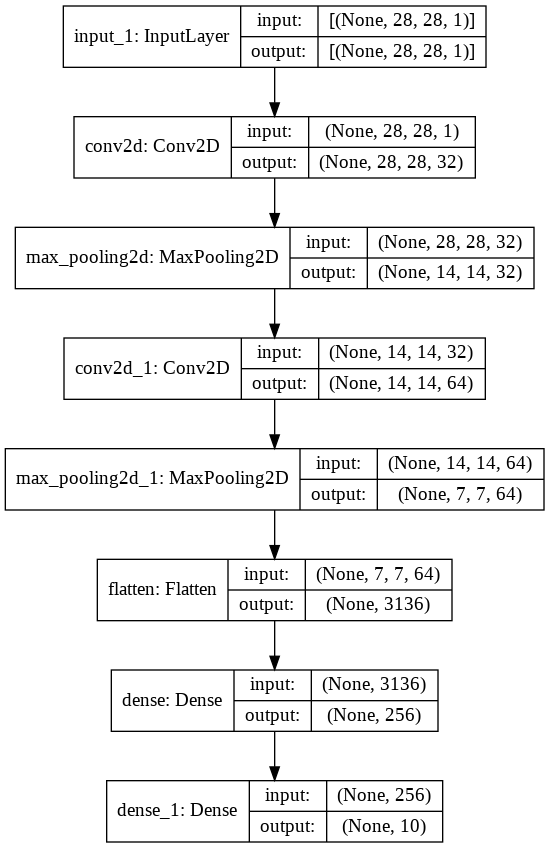

In [ ]:
keras.utils.plot_model(model,show_shapes = True)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy : y가 onehotencoding이 안된경우 사용
              metrics = ['accuracy'])

In [ ]:
steps_per_epoch = N_TRAIN // N_BATCHS
validation_steps = int(np.ceil(N_TEST/N_BATCHS))

In [ ]:
history = model.fit(train_dataset,
                    epochs = N_EPOCHS,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = test_dataset,
                    validation_steps = validation_steps)

Epoch 1/20
600/600 [==============================] - 36s 5ms/step - loss: 0.3777 - accuracy: 0.8823 - val_loss: 0.0420 - val_accuracy: 0.9859
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0281 - accuracy: 0.9914 - val_loss: 0.0271 - val_accuracy: 0.9902
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0219 - accuracy: 0.9934 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0371 - val_accuracy: 0.9892
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0378 - val_accuracy: 0.9884
Epoch

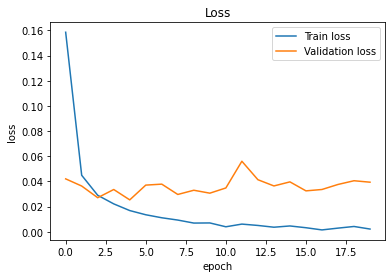

In [ ]:
plot_loss(history)

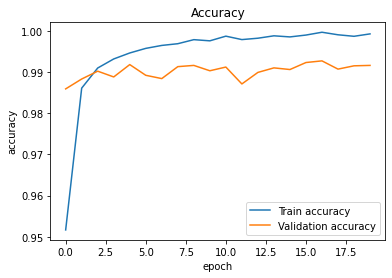

In [ ]:
plot_accuracy(history)

In [ ]:
model.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9916


[0.03938355669379234, 0.991599977016449]

In [ ]:
# 새로운 데이터 추론
pred = model.predict(X_test[:10])

In [ ]:
pred

array([[1.2077103e-19, 1.6352273e-14, 9.1621213e-20, 3.1739333e-16,
        1.4478089e-17, 1.2250046e-17, 2.0219891e-24, 1.0000000e+00,
        3.0954174e-19, 8.4967095e-15],
       [3.0325941e-12, 6.3595342e-14, 1.0000000e+00, 1.9264852e-22,
        2.5088333e-17, 9.1693964e-27, 1.6026536e-11, 4.6070589e-19,
        1.8796899e-16, 1.3346962e-23],
       [2.7282027e-15, 1.0000000e+00, 2.0385920e-11, 7.7492005e-20,
        1.7219317e-09, 1.1313923e-12, 6.2644177e-13, 6.5821626e-11,
        5.5233811e-11, 2.6216972e-14],
       [1.0000000e+00, 9.7200411e-21, 7.4477326e-19, 6.6309916e-22,
        9.4708251e-20, 6.8173040e-15, 5.5343965e-09, 3.4151740e-17,
        4.6883388e-15, 4.8407433e-15],
       [1.1347750e-15, 1.2852162e-15, 3.9306786e-16, 1.7232010e-19,
        1.0000000e+00, 2.1047856e-14, 1.1996852e-17, 7.6879135e-16,
        3.4919895e-14, 1.5645252e-11],
       [2.1130616e-16, 1.0000000e+00, 1.1903403e-13, 5.0348263e-22,
        7.6756813e-12, 4.1134232e-18, 4.0499652e-15, 4.99

In [ ]:
pred_class = np.argmax(pred,axis = -1)

In [ ]:
pred_class

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

### prediction error가 발생한 example 확인

In [ ]:
pred = model.predict(X_test)
pred_class = np.argmax(pred, axis=-1)
pred_class[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
# pred_class:예측결과, y_test: 실제정답
# 예측이 틀린 index를 조회
error_idx = np.where(pred_class != y_test)[0]
error_idx.size, error_idx

(84, array([  92,  321,  359,  583,  646,  659,  882,  883,  938,  947, 1014,
        1232, 1242, 1260, 1319, 1393, 1459, 1530, 1709, 1878, 1901, 2098,
        2118, 2129, 2130, 2135, 2280, 2293, 2414, 2462, 2496, 2597, 2648,
        2654, 2896, 2939, 2953, 2959, 3062, 3384, 3422, 3520, 3558, 3727,
        3808, 4163, 4176, 4201, 4248, 4350, 4504, 4548, 4571, 4723, 4740,
        4761, 4807, 4823, 4860, 4997, 5331, 5634, 5654, 5955, 6091, 6560,
        6571, 6576, 6597, 6614, 6625, 6651, 7216, 7574, 7849, 8059, 8408,
        9638, 9642, 9664, 9669, 9692, 9729, 9770]))

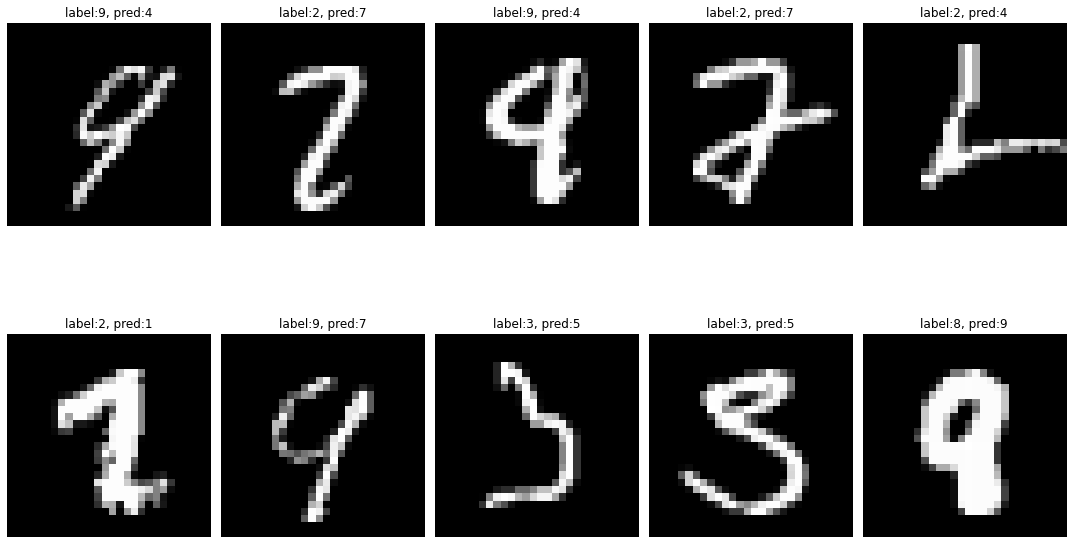

In [ ]:
# 틀린것 10개 확인
plt.figure(figsize=(15,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_image[error_idx[i]], cmap='gray')
  plt.title(f'label:{y_test[error_idx[i]]}, pred:{pred_class[error_idx[i]]}')
  plt.axis('off')

plt.tight_layout()
plt.show()

# 모델 저장
1. 학습이 끝난 모델의 파라미터만 저장
1. 모델 전체 저장
1. Callback 함수를 이용해 학습시 가장 좋은 지표의 모델 저장

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 텐서플로 파일 타입
- checkpoint 
    - 모델의 weight를 저장하기 위한 파일타입
- SavedModel 
    - 모델의 구조와 파라미터들을 모두 저장하는 형식

## 학습한 Weight (파라미터) 저장 및 불러오기
- 가중치를 저장하여 나중에 재학습 없이 학습된 가중치를 사용할 수 있다.
- 저장: `model.save_weights("저장경로")`
- 불러오기: `model.load_weights('불러올경로')`
- 저장형식
    - Tensorflow Checkpoint (기본방식)
    - HDF5
        - `save_weights(.., save_format='h5')`

In [ ]:
# 저장할 경로
import  os
base_dir = '/content/drive/MyDrive/saved_models' # 모델/ 파라미터 저장할 root
weight_dir = os.path.join(base_dir, 'mnist', 'weights')
print(weight_dir)
if not os.path.isdir(weight_dir):
  os.makedirs(weight_dir, exist_ok=True) # exist_ok = False(기본):이미 경로가 있으면 예외발생, True:예외발생 안시킴
weight_path = os.path.join(weight_dir, 'mnist_cnn_weights.ckpt') # 저장할 디렉토리 + 파일명

/content/drive/MyDrive/saved_models/mnist/weights


In [ ]:
model.save_weights(weight_path)

In [ ]:
new_model1 = create_model()
new_model1.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 1s 3ms/step - loss: 2.3126 - accuracy: 0.1780


[2.313303232192993, 0.17180000245571136]

In [ ]:
# 파일로 저장된 weight드을 생성된 모델(네트워크)에 저장
new_model1.load_weights(weight_path) # 재학습 할 필요없이 저장된 가중치를 불러올 수 있음

In [ ]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9916


[0.03938355669379234, 0.991599977016449]

In [ ]:
new_model1.fit() # 이어서 학습 하는것임

In [ ]:
# hdf5형식으로 저장/불러오기
weight_h5_dir = os.path.join(base_dir, 'mnist', 'weight_h5')
if not os.path.isdir(weight_h5_dir):
  os.makedirs(weight_h5_dir)
weight_h5_path = os.path.join(weight_h5_dir, 'mnist_cnn_weight.h5')
print(type(weight_h5_path), weight_h5_path)

<class 'str'> /content/drive/MyDrive/saved_models/mnist/weight_h5/mnist_cnn_weight.h5


In [ ]:
model.save_weights(weight_h5_path, save_format='h5')

In [ ]:
new_model2 = create_model()
new_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model2.evaluate(test_dataset)

100/100 [==============================] - 1s 3ms/step - loss: 2.3159 - accuracy: 0.0876


[2.315847158432007, 0.08489999920129776]

In [ ]:
new_model2.load_weights(weight_h5_path)
new_model2.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9916


[0.03938355669379234, 0.991599977016449]

## 전체 모델 저장하고 불러오기
- 저장: `model.save('저장할디렉토리')`
- 불러오기: `tf.keras.models.load_model('저장파일경로')`
- 저장 형식
    - Tensorflow SavedModel 형식(기본방식)
        - 모델 아키텍처 및 훈련 구성(옵티마이저, 손실 및 메트릭 포함)은 saved_model.pb 에 저장된다.
        - 파라미터는 variables/ 디렉토리에 저장된다.
        - https://www.tensorflow.org/guide/saved_model?hl=ko#the_savedmodel_format_on_disk
    - HDF5 형식
        - `save(..., save_format='h5')` 로 지정한다.
    

In [ ]:
model_dir = os.path.join(base_dir, 'mnist', 'models', 'saved_model')
if not os.path.isdir(model_dir):
  os.makedirs(model_dir, exist_ok=True)

print(model_dir)

/content/drive/MyDrive/saved_models/mnist/models/saved_model


In [ ]:
model.save(model_dir) # SaveModel 형식으로 저장시 디렉토리를 지정

INFO:tensorflow:Assets written to: /content/drive/MyDrive/saved_models/mnist/models/saved_model/assets


In [ ]:
new_model3 = tf.keras.models.load_model(model_dir)
new_model2.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
new_model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
new_model3.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9916


[0.03938355669379234, 0.991599977016449]

In [ ]:
# h5 형식으로 저장/ 불러오기
model_h5_dir = os.path.join(base_dir,'mnist','models','h5_model')
if not os.path.isdir(model_h5_dir):
  os.makedirs(model_h5_dir, exist_ok=True)

# h5 형식으로 저장할 때 파일명까지 지정
model_h5_path = os.path.join(model_h5_dir, 'mnist_cnn_model.h5')

In [ ]:
model.save(model_h5_path, save_format='h5')

In [ ]:
new_model4 = tf.keras.models.load_model(model_h5_path)

In [ ]:
new_model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [ ]:
new_model4.evaluate(test_dataset)

100/100 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9916


[0.03938355669379234, 0.991599977016449]

## Callback을 사용한 모델 저장 및 Early Stopping
- callback은 학습하는 도중 특정 이벤트 발생시 호출되는 다양한 함수를 제공하여 자동화 처리를 지원한다. (cf: 프로그래밍의 콜백함수)
- 다양한 콜백 클래스가 제공된다.
    - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
- `EarlyStopping`: Validation set에 대한 평가지표가  더 이상 개선되지 않을 때 학습을 자동으로 멈춤
    - `monitor`: 모니터링할 평가지표 지정. (ex: accuracy)
    - `patience`: epoch 수 지정. validation 평가 지표가 개선이 안되더라도 지정한 epoch만큼 반복한다. 지정한 epoch만큼 반복 후에도 개선이 되지 않으면 중단한다. 
- `ModelCheckpoint`: 지정한 평가지표(예:validation loss)가 가장 좋을 때 모델과 weight를 저장하여 overfitting이 발생하기 전의 model을 나중에 불러들여 사용할 수 있음
    - `save_best_only=True`: monitoring 중인 measure를 기준으로 최적의 모형의 weight만 저장 
- **callback 객체들을 리스트로 묶은 뒤 fit()의 callback 매개변수에 전달한다.**

In [ ]:
model2 = create_model()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.evaluate(test_dataset)

100/100 [==============================] - 1s 3ms/step - loss: 2.3058 - accuracy: 0.0561


[2.3060481548309326, 0.06459999829530716]

In [ ]:
'{age: .2f}, {price:05d}'.format(age=0.12313123, price=2) # 채울값(0)자릿수(5)정수(d)실수(f)

' 0.12, 00002'

In [ ]:
callback_dir = os.path.join(base_dir,'mnist','models','callback')
if not os.path.isdir(callback_dir):
  os.makedirs(callback_dir, exist_ok=True)

callback_path = os.path.join(callback_dir, 'save_model_{epoch:02d}.ckpt') # {epoch:02d} - {name}.format() 포맷문자열. 몇번째 에폭때 저장인지저장인지

In [ ]:
# ModelCheckpoint callback 생성
mc_callback = keras.callbacks.ModelCheckpoint(filepath=callback_path, #학습도중 모델의 파라미터/모델을 저장할 경로
                                              save_weights_only = True, # True:가중치 저장, False(기본): 모델+ 가중치
                                              save_best_only = True, # True: 가장 성능이 좋았을때만 저장. False(기본): 매 에폭마다
                                              monitor = 'val_loss', # save_best_only = True 일때 성능을 확인할 평가지표
                                              verbose = 1 # 저장할때마다 로그를 출력
                                              )

# EarlyStopping callback 생성
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5) # 5번 에폭을 학습하는 동안 loss가 좋아지지 않으면 학습을 멈춰라

In [ ]:
model2.fit(train_dataset,
           epochs=N_EPOCHS,
           steps_per_epoch = steps_per_epoch,
           validation_data = test_dataset,
           validation_steps = validation_steps,
           callbacks = [mc_callback, es_callback])

Epoch 1/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0568 - val_accuracy: 0.9914

Epoch 00001: val_loss improved from inf to 0.05676, saving model to /content/drive/MyDrive/saved_models/mnist/models/callback/save_model_01.ckpt
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 9.7371e-04 - accuracy: 0.9997 - val_loss: 0.0544 - val_accuracy: 0.9910

Epoch 00002: val_loss improved from 0.05676 to 0.05439, saving model to /content/drive/MyDrive/saved_models/mnist/models/callback/save_model_02.ckpt
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0771 - val_accuracy: 0.9900

Epoch 00003: val_loss did not improve from 0.05439
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0429 - val_accuracy: 0.9937

Epoch 00004: val_loss improved from 0.05439 to 0.04290, saving model to /conten

In [ ]:
# 저장된 weight loading
new_model5 = create_model()
new_model5.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# weight들이 저장된 디렉토리를 지정하면 마지막 에폭에서 저장된 weight를 불러온다
best_weights = tf.train.latest_checkpoint(callback_dir)

In [ ]:
new_model5.load_weights(best_weights)